In [1]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime
import math

sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = False

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize']= 18
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 2

In [3]:
libs=pd.read_csv('../../experiments/search-github/ahmed/libraries.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
libs_uniq=libs.drop_duplicates().query('library!="problem_unittests"')
#libs_uniq=libs.drop_duplicates()
libs.head()

,file,library,type
0,2763.json,menpowidgets,function
1,2763.json,menpowidgets,function
2,2763.json,menpo,function
3,2712.json,sklearn,function
4,2712.json,sklearn,function


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


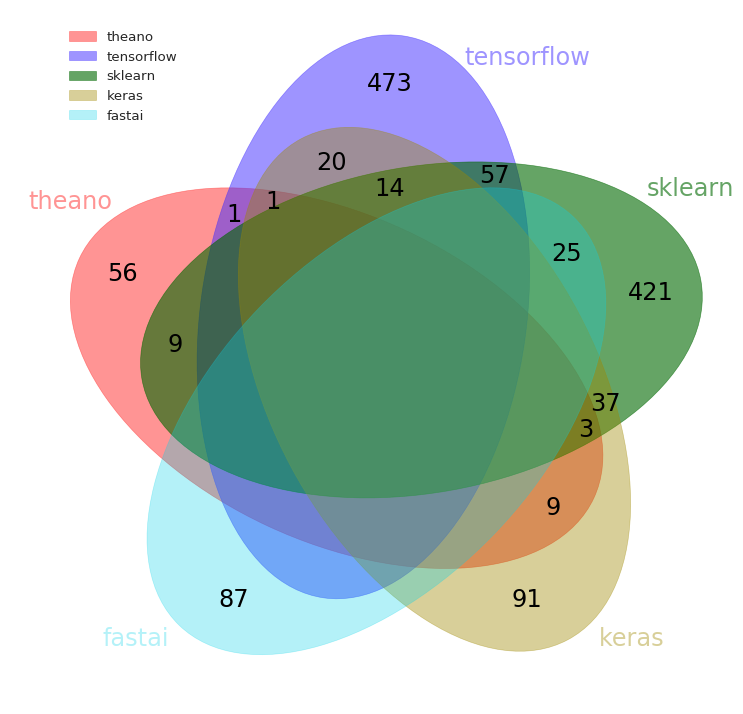

In [4]:
# This part is about venn diagram
libs_dl=libs.query('library=="sklearn" or '+
                  'library=="tensorflow" or '+
                   'library=="keras" or '+
                   'library=="fastai" or '+
                   'library=="theano"').groupby(['library','file']).count().reset_index()

# prepare list for association rules 
libs_set=libs_dl.loc[:,['file','library']]
lis=libs_set.groupby('file')['library'].apply(list)
tab= [i for i in lis]
from pymining import seqmining 
freq_seqs = seqmining.freq_seq_enum(tab, 1)
#print("Seuls: ",sorted(freq_seqs))

number={}
number['fastai']=1
number['keras']=10
number['sklearn']=100
number['tensorflow']=1000
number['theano']=10000
tabs={}
for x in freq_seqs:
    result=0
    for y in x[0]:
        result=result+number[y]
    result=str("%05d" % (result,))
    tabs[result]=x[1]
    
%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn

#labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fill=['number', 'logic'])
fig, ax = venn.venn5(tabs, names=list(reversed(sorted(number.keys()))))
ax.figure.savefig('venn5_notebooks.png', bbox_inches='tight', facecolor='white')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


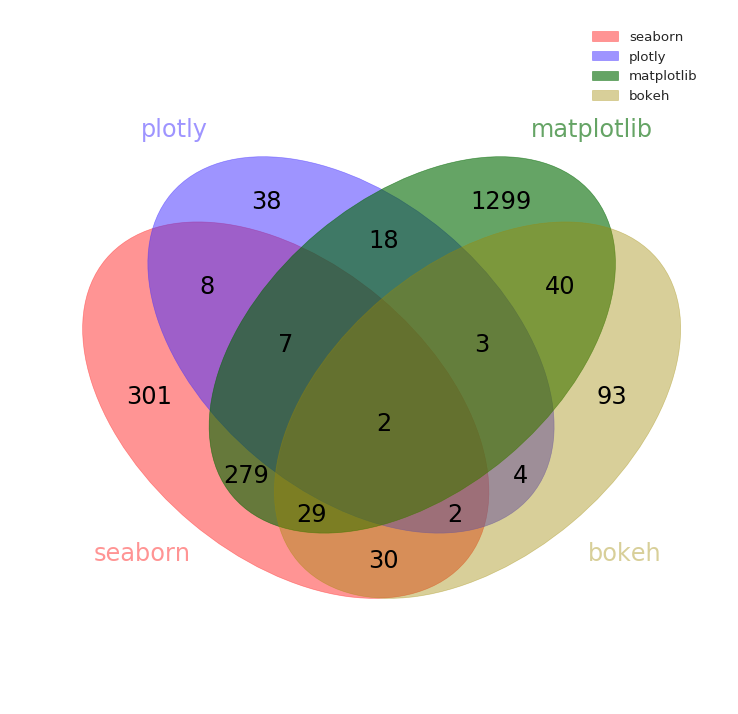

In [20]:
# This part is about venn diagram
libs_dl=libs.query('library=="matplotlib" or '+
                  'library=="seaborn" or '+
                   'library=="bokeh" or '+
                   'library=="plotly"').groupby(['library','file']).count().reset_index()

# prepare list for association rules 
libs_set=libs_dl.loc[:,['file','library']]
lis=libs_set.groupby('file')['library'].apply(list)
tab= [i for i in lis]
from pymining import seqmining 
freq_seqs = seqmining.freq_seq_enum(tab, 1)
#print("Seuls: ",sorted(freq_seqs))

number={}
number['bokeh']=1
number['matplotlib']=10
number['plotly']=100
number['seaborn']=1000

tabs={}
for x in freq_seqs:
    result=0
    for y in x[0]:
        result=result+number[y]
    result=str("%04d" % (result,))
    tabs[result]=x[1]
    
%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn

fig, ax = venn.venn4(tabs, names=list(reversed(sorted(number.keys()))))
ax.figure.savefig('venn4_notebooks.png', bbox_inches='tight', facecolor='white')

In [109]:
# Check popularity
df_rm=libs.drop_duplicates().groupby('library').count().reset_index()
df_rm.query('library=="sympy"')

,library,file,type
718,sympy,101,101


In [122]:
libs_g=libs.drop_duplicates().groupby('library').count().reset_index().query("file>100")
for row in libs_g.iterrows():
    print("{id: '%s', value: %s, label: '%s'}," % (str(row[1][0]),str(row[1][1]), str(row[1][0])))
len(libs_g)

{id: 'IPython', value: 913, label: 'IPython'},
{id: '__future__', value: 293, label: '__future__'},
{id: 'bokeh', value: 101, label: 'bokeh'},
{id: 'collections', value: 334, label: 'collections'},
{id: 'datetime', value: 143, label: 'datetime'},
{id: 'distutils', value: 310, label: 'distutils'},
{id: 'glob', value: 125, label: 'glob'},
{id: 'helper', value: 314, label: 'helper'},
{id: 'ipywidgets', value: 140, label: 'ipywidgets'},
{id: 'json', value: 119, label: 'json'},
{id: 'keras', value: 121, label: 'keras'},
{id: 'math', value: 257, label: 'math'},
{id: 'matplotlib', value: 1466, label: 'matplotlib'},
{id: 'mpl_toolkits', value: 140, label: 'mpl_toolkits'},
{id: 'numpy', value: 2024, label: 'numpy'},
{id: 'os', value: 655, label: 'os'},
{id: 'pandas', value: 764, label: 'pandas'},
{id: 'problem_unittests', value: 311, label: 'problem_unittests'},
{id: 'random', value: 242, label: 'random'},
{id: 're', value: 139, label: 're'},
{id: 'requests', value: 141, label: 'requests'},
{id

29

In [16]:
lib_groupby=libs_uniq.groupby('library').count().sort_values(['file'], ascending=False)
lib_groupby.tail(1)
top_30=lib_groupby.head(30)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


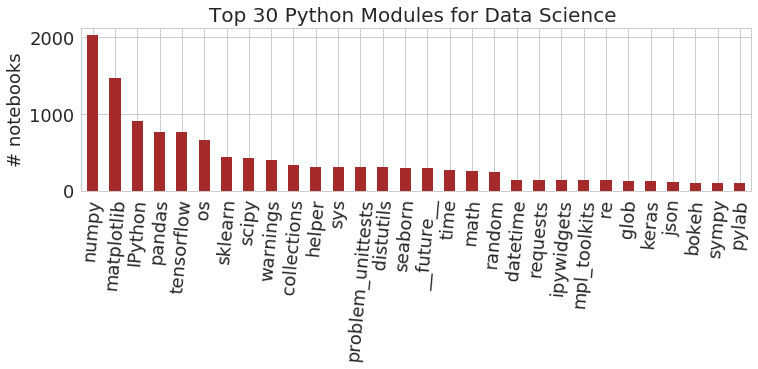

In [17]:
ax=lib_groupby.head(30).plot(kind='bar', y='file', color='brown')
ax.figure.set_size_inches(12,3)
ax.set_ylabel('# notebooks')
ax.set_xlabel('')
ax.legend('')
plt.xticks(rotation='85')
plt.title('Top 30 Python Modules for Data Science ', fontsize=20)
ax.figure.savefig('popularity.png', bbox_inches='tight', facecolor='white')

In [35]:
# prepare list for association rules 
libs_set=libs_uniq.loc[:,['file','library']]
lis=libs_set.groupby('file')['library'].apply(list)
tab= [i for i in lis]
len(tab)
s=0
for x in tab:
    if 'Bio' in x:
        s=s+1
s

5

In [36]:
tab

[['warnings', 'matplotlib', 'numpy', 'ctapipe'],
 ['jupman'],
 ['os',
  'time',
  'dicom',
  'numpy',
  'scipy',
  'skimage',
  'ipywidgets',
  'IPython',
  'ipywidgets',
  'matplotlib',
  'seaborn'],
 ['helper',
  'numpy',
  'distutils',
  'warnings',
  'tensorflow',
  'tensorflow',
  'imp'],
 ['gensim'],
 ['__future__', 'six', 'numpy', 'matplotlib', 'keras', 'wtte', 'wtte'],
 ['helper',
  'os',
  'glob',
  'matplotlib',
  'distutils',
  'warnings',
  'tensorflow',
  'numpy'],
 ['numpy', 'pandas'],
 ['numpy', 'pandas'],
 ['numpy', 'pandas'],
 ['fastai', 'torchtext', 'torchtext', 'dill'],
 ['matplotlib', 'numpy', 'os', 'pandas', 'sklearn'],
 ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn', 'sk_modelcurves'],
 ['decisiontrees', 'matplotlib', 'numpy', 'scipy'],
 ['numpy', 'keras', 'keras'],
 ['collections', '__future__', 'os', 'mod', 'numpy', 'matplotlib'],
 ['IPython', 'numpy', 'matplotlib'],
 ['numpy', 'numpy', 'math', 'IPython'],
 ['numpy', 'pandas'],
 ['os',
  'numpy',
  'matp

In [123]:
libsss=list(libs_g.library.values)
calcul={}
for index1, lib1 in enumerate(libsss):
    for index2, lib2 in enumerate(libsss):
        if(index2>index1):
            for notebook in tab:
                if( (lib1 in notebook) and (lib2 in notebook)):
                    try:
                        calcul[lib1][lib2]=calcul[lib1][lib2]+1
                    except:
                        try:
                            calcul[lib1][lib2]=1
                        except:
                            calcul[lib1]={}
                            calcul[lib1][lib2]=1



In [124]:
for lib1 in calcul:
    for lib2 in calcul[lib1]:
        print("{from: '%s', to: '%s', value: %s}," % (lib1,lib2,str(calcul[lib1][lib2])))

{from: 'sys', to: 'time', value: 104},
{from: 'sys', to: 'tensorflow', value: 30},
{from: 'sys', to: 'warnings', value: 18},
{from: 'keras', to: 'sys', value: 17},
{from: 'keras', to: 'time', value: 19},
{from: 'keras', to: 'os', value: 37},
{from: 'keras', to: 'pandas', value: 33},
{from: 'keras', to: 'numpy', value: 89},
{from: 'keras', to: 'sklearn', value: 37},
{from: 'keras', to: 'warnings', value: 1},
{from: 'keras', to: 're', value: 9},
{from: 'keras', to: 'matplotlib', value: 49},
{from: 'keras', to: 'mpl_toolkits', value: 1},
{from: 'keras', to: 'random', value: 8},
{from: 'keras', to: 'math', value: 5},
{from: 'keras', to: 'requests', value: 8},
{from: 'keras', to: 'tensorflow', value: 20},
{from: 'keras', to: 'scipy', value: 15},
{from: 'keras', to: 'seaborn', value: 6},
{from: 'problem_unittests', to: 'sys', value: 2},
{from: 'problem_unittests', to: 'time', value: 9},
{from: 'problem_unittests', to: 'random', value: 11},
{from: 'problem_unittests', to: 'sklearn', value: 8}

In [ ]:
from orangecontrib.associate.fpgrowth import *
# itemsets = frequent_itemsets(tab, 27)
# list(itemsets)
itemsets = dict(frequent_itemsets(tab, 5))
len(itemsets)

In [271]:
rules = association_rules(itemsets, .6)
rules=list(rules)
len(rules) # Oh evil sign detected

666

In [359]:
# search for something
check_list=['pandas']
#check_list=['pandas']
for rule in rules:
    #if ('warnings' and 'tensorflow') in list(rule[1]):
    if set(list(rule[1])) == set(check_list):
        print(list(rule[0]), ', in \x1b[32m%s\x1b[0m notebooks' % rule[2])
        #break # we can remove this comment to get all possibilites

['seaborn', 'matplotlib', 'numpy'] , in 190 notebooks
['matplotlib', 'numpy', 'sklearn'] , in 209 notebooks
['seaborn', 'numpy'] , in 210 notebooks
['matplotlib', 'sklearn'] , in 214 notebooks
['numpy', 'sklearn'] , in 248 notebooks
['seaborn', 'matplotlib'] , in 199 notebooks
['seaborn'] , in 220 notebooks
['sklearn'] , in 256 notebooks


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


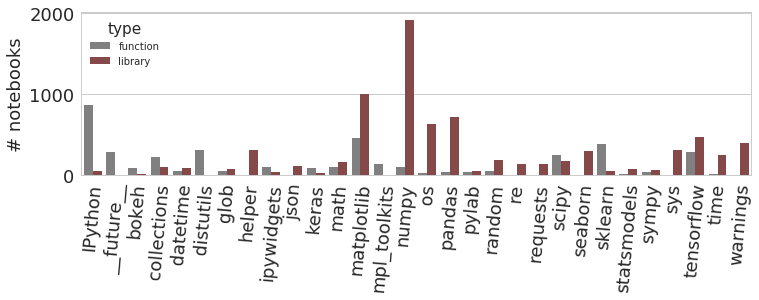

In [182]:
lib_groupby=(
    libs_uniq
    .groupby(['library','type'])
    .count()
    .query('file>9')
    .sort_values(['file'], ascending=False)
    .reset_index())

top_30['popular']=True
top_30=top_30.loc[:,['popular']]
top_30.head(2)
df=lib_groupby.set_index(['library']).merge(top_30, left_index=True, right_index=True)
df.reset_index(inplace=True)
#ax=lib_groupby.head(30).plot(kind='bar', x='library', hue="type", y='file', color='brown')

ax = sns.barplot(
    x="library", y="file", hue="type", data=df, 
    palette=['gray','brown'],
    saturation=0.5 )

ax.figure.set_size_inches(12,3)
ax.set_ylabel('# notebooks')
plt.xticks(rotation='85')
ax.set_xlabel('')
ax.figure.savefig('usage.png', bbox_inches='tight', facecolor='white')

In [332]:
libs['count']=1
lib_type=(libs
 .groupby(['file','library','type'])
 .count().reset_index()
)

No handles with labels found to put in legend.


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


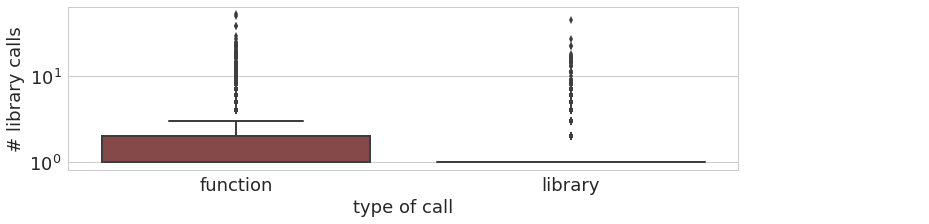

In [341]:
ax = sns.boxplot(y="count", x="type", data=lib_type, palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('# library calls')
ax.set_xlabel('type of call')
ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
#ax.set_ylim(0,5)
ax.legend( loc='upper right', bbox_to_anchor=(1.29, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)

In [356]:
print('function: ', lib_type.query('type=="function"')['count'].describe(),"\nlibrary: ",lib_type.query('type=="library"')['count'].describe())

function:  count    6208.000000
mean        1.834890
std         2.466197
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        52.000000
Name: count, dtype: float64 
library:  count    10710.000000
mean         1.478245
std          1.250733
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         44.000000
Name: count, dtype: float64
